# CIS550 Group Project

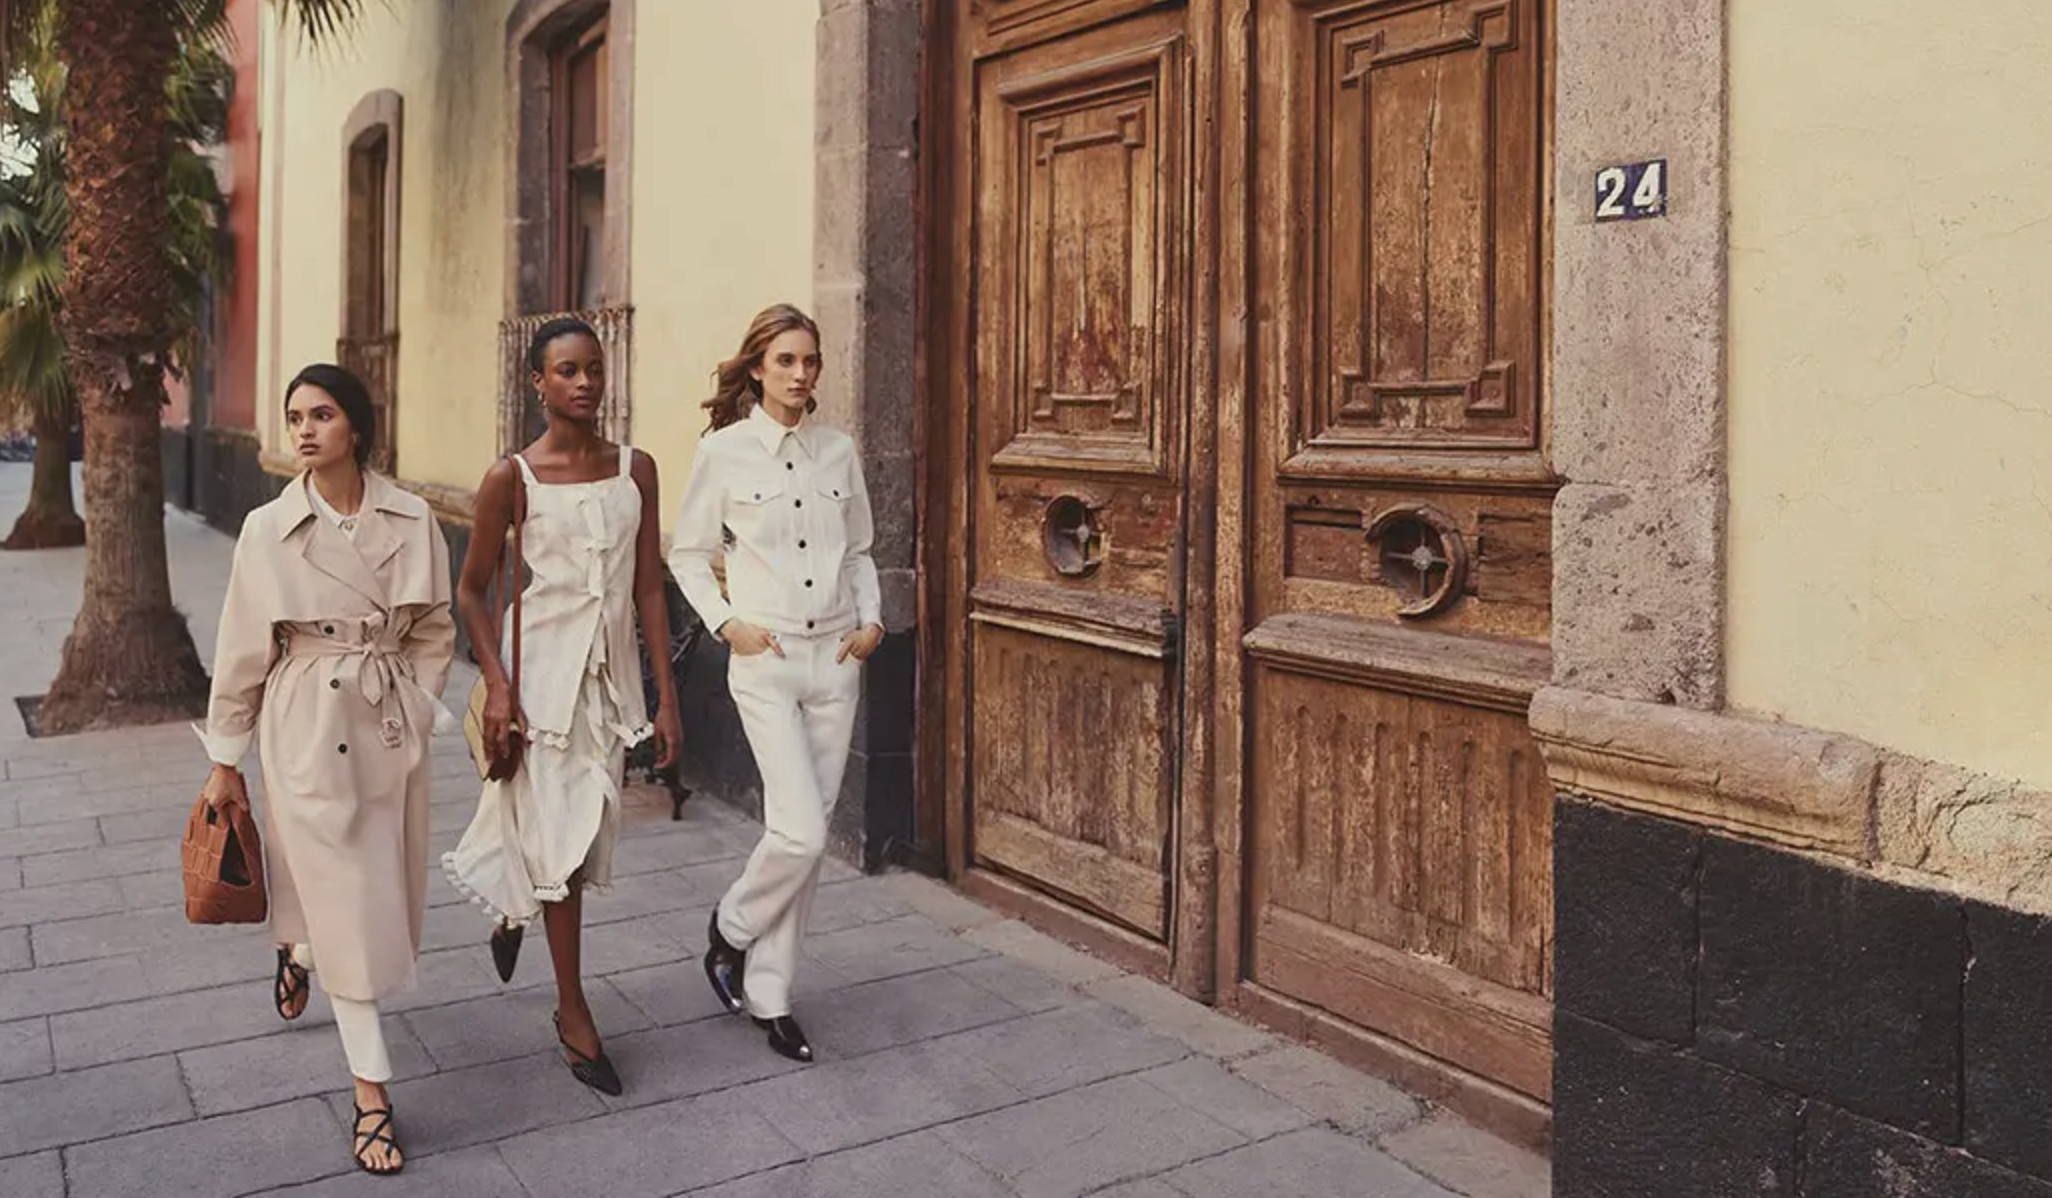

#### **Setup**

In [61]:
!pip install pandas==1.1.5
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from collections import Counter
import random
from random import sample
import sklearn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### **Import Data**

[Link to the dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_sellers_dataset.csv)

#### Read data from Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# items_data = pd.read_csv('/content/drive/My Drive/olist_order_items_dataset.csv')
# product_data = pd.read_csv('/content/drive/My Drive/olist_products_dataset.csv')
# city_data = pd.read_csv('/content/drive/My Drive/BRAZIL_CITIES.csv')
# customer_data = pd.read_csv('/content/drive/My Drive/olist_customers_dataset.csv')  
# geolocation_data = pd.read_csv('/content/drive/My Drive/olist_geolocation_dataset.csv')
# payment_data = pd.read_csv('/content/drive/My Drive/olist_order_payments_dataset.csv')
# order_data = pd.read_csv('/content/drive/My Drive/olist_orders_dataset.csv')
# category_data = pd.read_csv('/content/drive/My Drive/product_category_name_translation.csv')
# seller_data =  pd.read_csv('/content/drive/My Drive/olist_sellers_dataset.csv')
# review_data =  pd.read_csv('/content/drive/My Drive/olist_order_reviews_dataset.csv')
items_data = pd.read_csv('/content/drive/MyDrive/items.csv')
product_data = pd.read_csv('/content/drive/MyDrive/product.csv')
city_data = pd.read_csv('/content/drive/MyDrive/city.csv')
customer_data = pd.read_csv('/content/drive/MyDrive/customer.csv')  
geolocation_data = pd.read_csv('/content/drive/MyDrive/geolocation.csv')
payment_data = pd.read_csv('/content/drive/MyDrive/payment.csv')
order_data = pd.read_csv('/content/drive/MyDrive/order.csv')
category_data = pd.read_csv('/content/drive/MyDrive/product_category_name_translation.csv')
seller_data =  pd.read_csv('/content/drive/MyDrive/seller.csv')
review_data =  pd.read_csv('/content/drive/MyDrive/review.csv')
#pd.set_option('max_columns', None)

#### Read data from uploaded files

In [66]:
items_data = pd.read_csv('olist_order_items_dataset.csv')
product_data = pd.read_csv('olist_products_dataset.csv')
city_data = pd.read_csv('BRAZIL_CITIES(edited).csv')
customer_data = pd.read_csv('olist_customers_dataset.csv')
geolocation_data = pd.read_csv('olist_geolocation_dataset.csv')
payment_data = pd.read_csv('olist_order_payments_dataset.csv')
order_data = pd.read_csv('olist_orders_dataset.csv')
category_data = pd.read_csv('product_category_name_translation.csv')
seller_data =  pd.read_csv('olist_sellers_dataset.csv')
review_data =  pd.read_csv('olist_order_reviews_dataset.csv')
pd.set_option('max_columns', None)

FileNotFoundError: ignored

In [67]:
items_data

Unnamed: 0                          order_id  order_item_id  \
0                0  00010242fe8c5a6d1ba2dd792cb16214              1   
1                1  00018f77f2f0320c557190d7a144bdd3              1   
2                2  000229ec398224ef6ca0657da4fc703e              1   
3                3  00024acbcdf0a6daa1e931b038114c75              1   
4                4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
...            ...                               ...            ...   
112645      112645  fffc94f6ce00a00581880bf54a75a037              1   
112646      112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647      112647  fffce4705a9662cd70adb13d4a31832d              1   
112648      112648  fffe18544ffabc95dfada21779c9644f              1   
112649      112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 8 columns]

In [68]:
product_data

Unnamed: 0                        product_id  \
0               0  1e9e8ef04dbcff4541ed26657ea517e5   
1               1  3aa071139cb16b67ca9e5dea641aaa2f   
2               2  96bd76ec8810374ed1b65e291975717f   
3               3  cef67bcfe19066a932b7673e239eb23d   
4               4  9dc1a7de274444849c219cff195d0b71   
...           ...                               ...   
32335       32946  a0b7d5a992ccda646f2d34e418fff5a0   
32336       32947  bf4538d88321d0fd4412a93c974510e6   
32337       32948  9a7c6041fa9592d9d9ef6cfe62a71f8c   
32338       32949  83808703fc0706a22e264b9d75f04a2e   
32339       32950  106392145fca363410d287a815be6de4   

                   product_category_name  product_name_length  \
0                             perfumaria                 40.0   
1                                  artes                 44.0   
2                          esporte_lazer                 46.0   
3                                  bebes                 27.0   
4                  utilidades_domesticas                 37.0   
...                                  ...                  ...   
32335                   moveis_decoracao                 45.0   
32336  construcao_ferramentas_iluminacao                 41.0   
32337                    cama_mesa_banho                 50.0   
32338             informatica_acessorios                 60.0   
32339                    cama_mesa_banho                 58.0   

       product_description_length  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32335                        67.0                 2.0           12300.0   
32336                       971.0                 1.0            1700.0   
32337                       799.0                 1.0            1400.0   
32338                       156.0                 2.0             700.0   
32339                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  
0                   16.0               10.0              14.0  
1                   30.0               18.0              20.0  
2                   18.0                9.0              15.0  
3                   26.0                4.0              26.0  
4                   20.0               17.0              13.0  
...                  ...                ...               ...  
32335               40.0               40.0              40.0  
32336               16.0               19.0              16.0  
32337               27.0                7.0              27.0  
32338               31.0               13.0              20.0  
32339               12.0                2.0               7.0  

[32340 rows x 10 columns]

In [69]:
city_data

city state  longitude   latitude  altitude     area  \
0         abadia de goiás    GO -49.440548 -16.758812    893.60   147.26   
1     abadia dos dourados    MG -47.396832 -18.487565    753.12   881.06   
2               abadiânia    GO -48.718812 -16.182672   1017.55  1045.13   
3                  abaeté    MG -45.446191 -19.155848    644.74  1817.07   
4              abaetetuba    PA -48.884404  -1.723470     10.12  1610.65   
...                   ...   ...        ...        ...       ...      ...   
5569               zabelê    PB -37.093552  -8.076874    646.34   109.39   
5570             zacarias    SP -50.055740 -21.050110    415.85   319.06   
5571              zé doca    MA -45.657698  -3.275481     35.66  2140.11   
5572               zortéa    SC -51.549566 -27.450251    685.30   190.18   
5573                  NaN   NaN        NaN        NaN       NaN      NaN   

         taxes         gdp  res_population  pop_below1  ...  Unnamed: 245  \
0     20554.20      166.41          6876.0        69.0  ...           NaN   
1     12873.50      180.09          6704.0        38.0  ...           NaN   
2     26822.58   287984.49         15757.0       139.0  ...           NaN   
3     26994.09   430235.36         22690.0       176.0  ...           NaN   
4     95180.48  1249255.29        141100.0      1354.0  ...           NaN   
...        ...         ...             ...         ...  ...           ...   
5569    635.10    19582.06          2075.0        20.0  ...           NaN   
5570   1988.33    75934.89          2335.0        21.0  ...           NaN   
5571  22610.35   380509.30         50173.0       541.0  ...           NaN   
5572   3014.65    66998.29          2991.0        31.0  ...           NaN   
5573       NaN         NaN             NaN         NaN  ...           NaN   

      Unnamed: 246  Unnamed: 247  Unnamed: 248  Unnamed: 249  Unnamed: 250  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
5569           NaN           NaN           NaN           NaN           NaN   
5570           NaN           NaN           NaN           NaN           NaN   
5571           NaN           NaN           NaN           NaN           NaN   
5572           NaN           NaN           NaN           NaN           NaN   
5573           NaN           NaN           NaN           NaN           NaN   

      Unnamed: 251  Unnamed: 252  Unnamed: 253  Unnamed: 254  
0              NaN           NaN           NaN           NaN  
1              NaN           NaN           NaN           NaN  
2              NaN           NaN           NaN           NaN  
3              NaN           NaN           NaN           NaN  
4              NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...  
5569           NaN           NaN           NaN           NaN  
5570           NaN           NaN           NaN           NaN  
5571           NaN           NaN           NaN           NaN  
5572           NaN           NaN           NaN           NaN  
5573           NaN           NaN           NaN           NaN  

[5574 rows x 255 columns]

In [70]:
customer_data

Unnamed: 0                       customer_id  \
0               0  06b8999e2fba1a1fbc88172c00ba8bc7   
1               1  18955e83d337fd6b2def6b18a428ac77   
2               2  4e7b3e00288586ebd08712fdd0374a03   
3               3  b2b6027bc5c5109e529d4dc6358b12c3   
4               4  4f2d8ab171c80ec8364f7c12e35b23ad   
...           ...                               ...   
99436       99436  17ddf5dd5d51696bb3d7c6291687be6f   
99437       99437  e7b71a9017aa05c9a7fd292d714858e8   
99438       99438  5e28dfe12db7fb50a4b2f691faecea5e   
99439       99439  56b18e2166679b8a959d72dd06da27f9   
99440       99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
99437  d52a67c98be1cf6a5c84435bd38d095d                      6764   
99438  e9f50caf99f032f0bf3c55141f019d99                     60115   
99439  73c2643a0a458b49f58cea58833b192e                     92120   
99440  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  
0                     franca             SP  
1      sao bernardo do campo             SP  
2                  sao paulo             SP  
3            mogi das cruzes             SP  
4                   campinas             SP  
...                      ...            ...  
99436              sao paulo             SP  
99437        taboao da serra             SP  
99438              fortaleza             CE  
99439                 canoas             RS  
99440                  cotia             SP  

[99441 rows x 6 columns]

In [71]:
geolocation_data

Unnamed: 0  geolocation_zip_code_prefix  geolocation_lat  \
0                 0                         1037       -23.545621   
1                 1                         1046       -23.546081   
2                 2                         1046       -23.546129   
3                 3                         1041       -23.544392   
4                 4                         1035       -23.541578   
...             ...                          ...              ...   
1000158     1000158                        99950       -28.068639   
1000159     1000159                        99900       -27.877125   
1000160     1000160                        99950       -28.071855   
1000161     1000161                        99980       -28.388932   
1000162     1000162                        99950       -28.070104   

         geolocation_lng geolocation_city geolocation_state  
0             -46.639292        sao paulo                SP  
1             -46.644820        sao paulo                SP  
2             -46.642951        sao paulo                SP  
3             -46.639499        sao paulo                SP  
4             -46.641607        sao paulo                SP  
...                  ...              ...               ...  
1000158       -52.010705         tapejara                RS  
1000159       -52.224882   getulio vargas                RS  
1000160       -52.014716         tapejara                RS  
1000161       -51.846871  david canabarro                RS  
1000162       -52.018658         tapejara                RS  

[1000163 rows x 6 columns]

In [72]:
payment_data

Unnamed: 0                          order_id  payment_sequential  \
0                0  b81ef226f3fe1789b1e8b2acac839d17                   1   
1                1  a9810da82917af2d9aefd1278f1dcfa0                   1   
2                2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1   
3                3  ba78997921bbcdc1373bb41e913ab953                   1   
4                4  42fdf880ba16b47b59251dd489d4441a                   1   
...            ...                               ...                 ...   
103881      103881  0406037ad97740d563a178ecc7a2075c                   1   
103882      103882  7b905861d7c825891d6347454ea7863f                   1   
103883      103883  32609bbb3dd69b3c066a6860554a77bf                   1   
103884      103884  b8b61059626efa996a60be9bb9320e10                   1   
103885      103885  28bbae6599b09d39ca406b747b6632b1                   1   

       payment_type  payment_installments  payment_value  
0       credit_card                     8          99.33  
1       credit_card                     1          24.39  
2       credit_card                     1          65.71  
3       credit_card                     8         107.78  
4       credit_card                     2         128.45  
...             ...                   ...            ...  
103881       boleto                     1         363.31  
103882  credit_card                     2          96.80  
103883  credit_card                     1          47.77  
103884  credit_card                     5         369.54  
103885       boleto                     1         191.58  

[103886 rows x 6 columns]

In [73]:
order_data

Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               1  53cdb2fc8bc7dce0b6741e2150273451   
2               2  47770eb9100c2d0c44946d9cf07ec65d   
3               3  949d5b44dbf5de918fe9c16f97b45f8a   
4               4  ad21c59c0840e6cb83a9ceb5573f8159   
...           ...                               ...   
96456       99436  9c5dedf39a927c1b2549525ed64a053c   
96457       99437  63943bddc261676b46f01ca7ac2f7bd8   
96458       99438  83c1379a015df1e13d02aae0204711ab   
96459       99439  11c177c8e97725db2631073c19f07b62   
96460       99440  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4      8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                 ...          ...                      ...   
96456  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
96457  1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
96458  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
96459  b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
96460  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 22:20:29          2018-02-14 19:46:34   
...                    ...                          ...   
96456  2017-03-09 09:54:05          2017-03-10 11:18:03   
96457  2018-02-06 13:10:37          2018-02-07 23:22:42   
96458  2017-08-27 15:04:16          2017-08-28 20:52:26   
96459  2018-01-08 21:36:21          2018-01-12 15:35:03   
96460  2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13           2017-10-18 00:00:00   
1               2018-08-07 15:27:45           2018-08-13 00:00:00   
2               2018-08-17 18:06:29           2018-09-04 00:00:00   
3               2017-12-02 00:28:42           2017-12-15 00:00:00   
4               2018-02-16 18:17:02           2018-02-26 00:00:00   
...                             ...                           ...   
96456           2017-03-17 15:08:01           2017-03-28 00:00:00   
96457           2018-02-28 17:37:56           2018-03-02 00:00:00   
96458           2017-09-21 11:24:17           2017-09-27 00:00:00   
96459           2018-01-25 23:32:54           2018-02-15 00:00:00   
96460           2018-03-16 13:08:30           2018-04-03 00:00:00   

       order_purchase_year  ...  order_approve_day  \
0                     2017  ...                  2   
1                     2018  ...                 26   
2                     2018  ...                  8   
3                     2017  ...                 18   
4                     2018  ...                 13   
...                    ...  ...                ...   
96456                 2017  ...                  9   
96457                 2018  ...                  6   
96458                 2017  ...                 27   
96459                 2018  ...                  8   
96460                 2018  ...                  9   

       order_deliver_carrier_year  order_deliver_carrier_month  \
0                            2017                           10   
1                            2018                     

In [74]:
category_data

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [75]:
seller_data

Unnamed: 0                         seller_id  seller_zip_code_prefix  \
0              0  3442f8959a84dea7ee197c632cb2df15                   13023   
1              1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2              2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3              3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4              4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...          ...                               ...                     ...   
3090        3090  98dddbc4601dd4443ca174359b237166                   87111   
3091        3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092        3092  74871d19219c7d518d0090283e03c137                    4650   
3093        3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094        3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 5 columns]

In [76]:
review_data

Unnamed: 0                         review_id  \
0              9  8670d52e15e00043ae7de4c01cc2fe06   
1             15  3948b09f7c818e2d86c9a546758b2335   
2             19  373cbeecea8286a2b66c97b1b157ec46   
3             22  d21bbc789670eab777d27372ab9094cc   
4             34  c92cdd7dd544a01aa35137f901669cdf   
...          ...                               ...   
9834       99187  47e0954e156dac6512c25c6d2ecc1c66   
9835       99192  0e7bc73fde6782891898ea71443f9904   
9836       99196  58be140ccdc12e8908ff7fd2ba5c7cb0   
9837       99197  51de4e06a6b701cb2be47ea0e689437b   
9838       99200  2ee221b28e5b6fceffac59487ed39348   

                              order_id  review_score  \
0     b9bf720beb4ab3728760088589c62129             4   
1     e51478e7e277a83743b6f9991dbfa3fb             5   
2     583174fbe37d3d5f0d6661be3aad1786             1   
3     4fc44d78867142c627497b60a7e0228a             5   
4     37e7875cdce5a9e5b3a692971f370151             4   
...                                ...           ...   
9834  16cbf959cfdb88c47ee2a29303547ec2             5   
9835  bd78f91afbb1ecbc6124974c5e813043             4   
9836  0ebf8e35b9807ee2d717922d5663ccdb             5   
9837  b7467ae483dbe956fe9acdf0b1e6e3f4             3   
9838  f2d12dd37eaef72ed7b1186b2edefbcd             2   

           review_comment_title  \
0                     recomendo   
1               Super recomendo   
2       Não chegou meu produto    
3                         Ótimo   
4                    Muito bom.   
...                         ...   
9834               Nota máxima!   
9835                          👍   
9836         muito bom produto    
9837  Não foi entregue o pedido   
9838             Foto enganosa    

                                 review_comment_message review_creation_date  \
0     aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
1     Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   
2                                               Péssimo  2018-08-15 00:00:00   
3                                          Loja nota 10  2018-07-10 00:00:00   
4     Recebi exatamente o que esperava. As demais en...  2018-06-07 00:00:00   
...                                                 ...                  ...   
9834  Muito obrigado,\r\n\r\nExcelente atendimento,b...  2018-05-22 00:00:00   
9835                                          Aprovado!  2018-07-04 00:00:00   
9836  Ficamos muito satisfeitos com o produto, atend...  2018-06-30 00:00:00   
9837  Bom dia \r\nDas 6 unidades compradas só recebi...  2018-06-05 00:00:00   
9838  Foto muito diferente principalmente a graninha...  2018-03-28 00:00:00   

     review_answer_timestamp  
0        2018-05-23 16:45:47  
1        2018-05-24 03:00:01  
2        2018-08-15 04:10:37  
3        2018-07-11 14:10:25  
4        2018-06-09 18:44:02  
...                      ...  
9834     2018-05-23 00:51:43  
9835     2018-07-05 00:25:13  
9836     2018-07-02 23:09:35  
9837     2018-06-06 10:52:19  
9838     2018-05-25 01:23:26  

[9839 rows x 8 columns]

#### **Data Cleaning**

In [77]:
city_data

city state  longitude   latitude  altitude     area  \
0         abadia de goiás    GO -49.440548 -16.758812    893.60   147.26   
1     abadia dos dourados    MG -47.396832 -18.487565    753.12   881.06   
2               abadiânia    GO -48.718812 -16.182672   1017.55  1045.13   
3                  abaeté    MG -45.446191 -19.155848    644.74  1817.07   
4              abaetetuba    PA -48.884404  -1.723470     10.12  1610.65   
...                   ...   ...        ...        ...       ...      ...   
5569               zabelê    PB -37.093552  -8.076874    646.34   109.39   
5570             zacarias    SP -50.055740 -21.050110    415.85   319.06   
5571              zé doca    MA -45.657698  -3.275481     35.66  2140.11   
5572               zortéa    SC -51.549566 -27.450251    685.30   190.18   
5573                  NaN   NaN        NaN        NaN       NaN      NaN   

         taxes         gdp  res_population  pop_below1  ...  Unnamed: 245  \
0     20554.20      166.41          6876.0        69.0  ...           NaN   
1     12873.50      180.09          6704.0        38.0  ...           NaN   
2     26822.58   287984.49         15757.0       139.0  ...           NaN   
3     26994.09   430235.36         22690.0       176.0  ...           NaN   
4     95180.48  1249255.29        141100.0      1354.0  ...           NaN   
...        ...         ...             ...         ...  ...           ...   
5569    635.10    19582.06          2075.0        20.0  ...           NaN   
5570   1988.33    75934.89          2335.0        21.0  ...           NaN   
5571  22610.35   380509.30         50173.0       541.0  ...           NaN   
5572   3014.65    66998.29          2991.0        31.0  ...           NaN   
5573       NaN         NaN             NaN         NaN  ...           NaN   

      Unnamed: 246  Unnamed: 247  Unnamed: 248  Unnamed: 249  Unnamed: 250  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
5569           NaN           NaN           NaN           NaN           NaN   
5570           NaN           NaN           NaN           NaN           NaN   
5571           NaN           NaN           NaN           NaN           NaN   
5572           NaN           NaN           NaN           NaN           NaN   
5573           NaN           NaN           NaN           NaN           NaN   

      Unnamed: 251  Unnamed: 252  Unnamed: 253  Unnamed: 254  
0              NaN           NaN           NaN           NaN  
1              NaN           NaN           NaN           NaN  
2              NaN           NaN           NaN           NaN  
3              NaN           NaN           NaN           NaN  
4              NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...  
5569           NaN           NaN           NaN           NaN  
5570           NaN           NaN           NaN           NaN  
5571           NaN           NaN           NaN           NaN  
5572           NaN           NaN           NaN           NaN  
5573           NaN           NaN           NaN           NaN  

[5574 rows x 255 columns]

In [78]:
order_items_data = items_data.dropna()
product_data = product_data.dropna()
# city_data = city_data.dropna()
geolocation_data = geolocation_data.dropna()
customer_data = customer_data.dropna()
payment_data = payment_data.dropna()
review_data = review_data.dropna()
order_data = order_data.dropna()
seller_data = seller_data.dropna()
category_data = category_data.dropna()

In [79]:
product_data

Unnamed: 0                        product_id  \
0               0  1e9e8ef04dbcff4541ed26657ea517e5   
1               1  3aa071139cb16b67ca9e5dea641aaa2f   
2               2  96bd76ec8810374ed1b65e291975717f   
3               3  cef67bcfe19066a932b7673e239eb23d   
4               4  9dc1a7de274444849c219cff195d0b71   
...           ...                               ...   
32335       32946  a0b7d5a992ccda646f2d34e418fff5a0   
32336       32947  bf4538d88321d0fd4412a93c974510e6   
32337       32948  9a7c6041fa9592d9d9ef6cfe62a71f8c   
32338       32949  83808703fc0706a22e264b9d75f04a2e   
32339       32950  106392145fca363410d287a815be6de4   

                   product_category_name  product_name_length  \
0                             perfumaria                 40.0   
1                                  artes                 44.0   
2                          esporte_lazer                 46.0   
3                                  bebes                 27.0   
4                  utilidades_domesticas                 37.0   
...                                  ...                  ...   
32335                   moveis_decoracao                 45.0   
32336  construcao_ferramentas_iluminacao                 41.0   
32337                    cama_mesa_banho                 50.0   
32338             informatica_acessorios                 60.0   
32339                    cama_mesa_banho                 58.0   

       product_description_length  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32335                        67.0                 2.0           12300.0   
32336                       971.0                 1.0            1700.0   
32337                       799.0                 1.0            1400.0   
32338                       156.0                 2.0             700.0   
32339                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  
0                   16.0               10.0              14.0  
1                   30.0               18.0              20.0  
2                   18.0                9.0              15.0  
3                   26.0                4.0              26.0  
4                   20.0               17.0              13.0  
...                  ...                ...               ...  
32335               40.0               40.0              40.0  
32336               16.0               19.0              16.0  
32337               27.0                7.0              27.0  
32338               31.0               13.0              20.0  
32339               12.0                2.0               7.0  

[32340 rows x 10 columns]

In [80]:
city_data

city state  longitude   latitude  altitude     area  \
0         abadia de goiás    GO -49.440548 -16.758812    893.60   147.26   
1     abadia dos dourados    MG -47.396832 -18.487565    753.12   881.06   
2               abadiânia    GO -48.718812 -16.182672   1017.55  1045.13   
3                  abaeté    MG -45.446191 -19.155848    644.74  1817.07   
4              abaetetuba    PA -48.884404  -1.723470     10.12  1610.65   
...                   ...   ...        ...        ...       ...      ...   
5569               zabelê    PB -37.093552  -8.076874    646.34   109.39   
5570             zacarias    SP -50.055740 -21.050110    415.85   319.06   
5571              zé doca    MA -45.657698  -3.275481     35.66  2140.11   
5572               zortéa    SC -51.549566 -27.450251    685.30   190.18   
5573                  NaN   NaN        NaN        NaN       NaN      NaN   

         taxes         gdp  res_population  pop_below1  ...  Unnamed: 245  \
0     20554.20      166.41          6876.0        69.0  ...           NaN   
1     12873.50      180.09          6704.0        38.0  ...           NaN   
2     26822.58   287984.49         15757.0       139.0  ...           NaN   
3     26994.09   430235.36         22690.0       176.0  ...           NaN   
4     95180.48  1249255.29        141100.0      1354.0  ...           NaN   
...        ...         ...             ...         ...  ...           ...   
5569    635.10    19582.06          2075.0        20.0  ...           NaN   
5570   1988.33    75934.89          2335.0        21.0  ...           NaN   
5571  22610.35   380509.30         50173.0       541.0  ...           NaN   
5572   3014.65    66998.29          2991.0        31.0  ...           NaN   
5573       NaN         NaN             NaN         NaN  ...           NaN   

      Unnamed: 246  Unnamed: 247  Unnamed: 248  Unnamed: 249  Unnamed: 250  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
5569           NaN           NaN           NaN           NaN           NaN   
5570           NaN           NaN           NaN           NaN           NaN   
5571           NaN           NaN           NaN           NaN           NaN   
5572           NaN           NaN           NaN           NaN           NaN   
5573           NaN           NaN           NaN           NaN           NaN   

      Unnamed: 251  Unnamed: 252  Unnamed: 253  Unnamed: 254  
0              NaN           NaN           NaN           NaN  
1              NaN           NaN           NaN           NaN  
2              NaN           NaN           NaN           NaN  
3              NaN           NaN           NaN           NaN  
4              NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...  
5569           NaN           NaN           NaN           NaN  
5570           NaN           NaN           NaN           NaN  
5571           NaN           NaN           NaN           NaN  
5572           NaN           NaN           NaN           NaN  
5573           NaN           NaN           NaN           NaN  

[5574 rows x 255 columns]

In [81]:
order_data['order_purchase_year'] = pd.DatetimeIndex(order_data['order_purchase_timestamp']).year
order_data['order_purchase_month'] = pd.DatetimeIndex(order_data['order_purchase_timestamp']).month
order_data['order_purchase_day'] = pd.DatetimeIndex(order_data['order_purchase_timestamp']).day
order_data['order_approve_year'] = pd.DatetimeIndex(order_data['order_approved_at']).year
order_data['order_approve_month'] = pd.DatetimeIndex(order_data['order_approved_at']).month
order_data['order_approve_day'] = pd.DatetimeIndex(order_data['order_approved_at']).day
order_data['order_deliver_carrier_year'] = pd.DatetimeIndex(order_data['order_delivered_carrier_date']).year
order_data['order_deliver_carrier_month'] = pd.DatetimeIndex(order_data['order_delivered_carrier_date']).month
order_data['order_deliver_carrier_day'] = pd.DatetimeIndex(order_data['order_delivered_carrier_date']).day
order_data['order_deliver_customer_year'] = pd.DatetimeIndex(order_data['order_delivered_customer_date']).year
order_data['order_deliver_customer_month'] = pd.DatetimeIndex(order_data['order_delivered_customer_date']).month
order_data['order_deliver_customer_day'] = pd.DatetimeIndex(order_data['order_delivered_customer_date']).day
order_data['order_estimate_delivery_year'] = pd.DatetimeIndex(order_data['order_estimated_delivery_date']).year
order_data['order_estimate_delivery_month'] = pd.DatetimeIndex(order_data['order_estimated_delivery_date']).month
order_data['order_estimate_delivery_day'] = pd.DatetimeIndex(order_data['order_estimated_delivery_date']).day

In [82]:
product_data = product_data.rename(columns={'product_name_lenght':'product_name_length'})
product_data = product_data.rename(columns={'product_description_lenght':'product_description_length'})

In [83]:
city_data

city state  longitude   latitude  altitude     area  \
0         abadia de goiás    GO -49.440548 -16.758812    893.60   147.26   
1     abadia dos dourados    MG -47.396832 -18.487565    753.12   881.06   
2               abadiânia    GO -48.718812 -16.182672   1017.55  1045.13   
3                  abaeté    MG -45.446191 -19.155848    644.74  1817.07   
4              abaetetuba    PA -48.884404  -1.723470     10.12  1610.65   
...                   ...   ...        ...        ...       ...      ...   
5569               zabelê    PB -37.093552  -8.076874    646.34   109.39   
5570             zacarias    SP -50.055740 -21.050110    415.85   319.06   
5571              zé doca    MA -45.657698  -3.275481     35.66  2140.11   
5572               zortéa    SC -51.549566 -27.450251    685.30   190.18   
5573                  NaN   NaN        NaN        NaN       NaN      NaN   

         taxes         gdp  res_population  pop_below1  ...  Unnamed: 245  \
0     20554.20      166.41          6876.0        69.0  ...           NaN   
1     12873.50      180.09          6704.0        38.0  ...           NaN   
2     26822.58   287984.49         15757.0       139.0  ...           NaN   
3     26994.09   430235.36         22690.0       176.0  ...           NaN   
4     95180.48  1249255.29        141100.0      1354.0  ...           NaN   
...        ...         ...             ...         ...  ...           ...   
5569    635.10    19582.06          2075.0        20.0  ...           NaN   
5570   1988.33    75934.89          2335.0        21.0  ...           NaN   
5571  22610.35   380509.30         50173.0       541.0  ...           NaN   
5572   3014.65    66998.29          2991.0        31.0  ...           NaN   
5573       NaN         NaN             NaN         NaN  ...           NaN   

      Unnamed: 246  Unnamed: 247  Unnamed: 248  Unnamed: 249  Unnamed: 250  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
5569           NaN           NaN           NaN           NaN           NaN   
5570           NaN           NaN           NaN           NaN           NaN   
5571           NaN           NaN           NaN           NaN           NaN   
5572           NaN           NaN           NaN           NaN           NaN   
5573           NaN           NaN           NaN           NaN           NaN   

      Unnamed: 251  Unnamed: 252  Unnamed: 253  Unnamed: 254  
0              NaN           NaN           NaN           NaN  
1              NaN           NaN           NaN           NaN  
2              NaN           NaN           NaN           NaN  
3              NaN           NaN           NaN           NaN  
4              NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...  
5569           NaN           NaN           NaN           NaN  
5570           NaN           NaN           NaN           NaN  
5571           NaN           NaN           NaN           NaN  
5572           NaN           NaN           NaN           NaN  
5573           NaN           NaN           NaN           NaN  

[5574 rows x 255 columns]

In [85]:
city_data = city_data[['CITY', 'STATE','LONG','LAT','ALT','AREA','TAXES','GDP','IBGE_RES_POP','IBGE_1','IBGE_1-4','IBGE_5-9','IBGE_10-14','IBGE_15-59','IBGE_60+', 'IDHM','PAY_TV','COMP_TOT','COMP_A','COMP_B','COMP_C','COMP_D','COMP_E','COMP_F','COMP_G','COMP_H','COMP_I','COMP_J','COMP_K','COMP_L','COMP_M','COMP_N','COMP_O','COMP_P','COMP_Q','COMP_R','COMP_S','COMP_T','COMP_U','WAL-MART']]

KeyError: ignored

In [ ]:
city_data = city_data.rename(columns={'CITY':'city'})
city_data = city_data.rename(columns={'STATE':'state'})
city_data = city_data.rename(columns={'LONG':'longitude'})
city_data = city_data.rename(columns={'LAT':'latitude'})
city_data = city_data.rename(columns={'ALT':'altitude'})
city_data = city_data.rename(columns={'AREA':'area'})
city_data = city_data.rename(columns={'TAXES':'taxes'})
city_data = city_data.rename(columns={'GDP':'gdp'})
city_data = city_data.rename(columns={'IBGE_RES_POP':'res_population'})
city_data = city_data.rename(columns={'IBGE_1':'pop_below1'})
city_data = city_data.rename(columns={'IBGE_1-4':'pop_1_4'})
city_data = city_data.rename(columns={'IBGE_5-9':'pop_5_9'})
city_data = city_data.rename(columns={'IBGE_10-14':'pop_10_14'})
city_data = city_data.rename(columns={'IBGE_15-59':'pop_15_59'})
city_data = city_data.rename(columns={'IBGE_60+':'pop_60'})
city_data = city_data.rename(columns={'IDHM':'HDI'})
city_data = city_data.rename(columns={'PAY_TV':'pay_TV'})
city_data = city_data.rename(columns={'COM_TOT':'total_company'})
city_data = city_data.rename(columns={'WAL-MART':'walmart'})

In [ ]:
city_data['area'] = city_data['area'].str.replace(',', '').astype(float)

In [ ]:
city_data

In [ ]:
city_data

In [ ]:
city_data['city'] = city_data['city'].str.lower()

In [ ]:
city_data

In [86]:
category_data

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [87]:
category_data['product_category_name'] = category_data['product_category_name'].str.replace('_', ' ')

In [88]:
category_data['product_category_name_english'] = category_data['product_category_name_english'].str.replace('_', ' ')

In [89]:
product_data

Unnamed: 0                        product_id  \
0               0  1e9e8ef04dbcff4541ed26657ea517e5   
1               1  3aa071139cb16b67ca9e5dea641aaa2f   
2               2  96bd76ec8810374ed1b65e291975717f   
3               3  cef67bcfe19066a932b7673e239eb23d   
4               4  9dc1a7de274444849c219cff195d0b71   
...           ...                               ...   
32335       32946  a0b7d5a992ccda646f2d34e418fff5a0   
32336       32947  bf4538d88321d0fd4412a93c974510e6   
32337       32948  9a7c6041fa9592d9d9ef6cfe62a71f8c   
32338       32949  83808703fc0706a22e264b9d75f04a2e   
32339       32950  106392145fca363410d287a815be6de4   

                   product_category_name  product_name_length  \
0                             perfumaria                 40.0   
1                                  artes                 44.0   
2                          esporte_lazer                 46.0   
3                                  bebes                 27.0   
4                  utilidades_domesticas                 37.0   
...                                  ...                  ...   
32335                   moveis_decoracao                 45.0   
32336  construcao_ferramentas_iluminacao                 41.0   
32337                    cama_mesa_banho                 50.0   
32338             informatica_acessorios                 60.0   
32339                    cama_mesa_banho                 58.0   

       product_description_length  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32335                        67.0                 2.0           12300.0   
32336                       971.0                 1.0            1700.0   
32337                       799.0                 1.0            1400.0   
32338                       156.0                 2.0             700.0   
32339                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  
0                   16.0               10.0              14.0  
1                   30.0               18.0              20.0  
2                   18.0                9.0              15.0  
3                   26.0                4.0              26.0  
4                   20.0               17.0              13.0  
...                  ...                ...               ...  
32335               40.0               40.0              40.0  
32336               16.0               19.0              16.0  
32337               27.0                7.0              27.0  
32338               31.0               13.0              20.0  
32339               12.0                2.0               7.0  

[32340 rows x 10 columns]

**Dataset Summary**

In [90]:
customer_data.to_csv('customer.csv')
!cp data.csv "drive/My Drive/"

cp: cannot stat 'data.csv': No such file or directory


In [91]:
from google.colab import files
customer_data.to_csv('customer.csv') 
files.download('customer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.3+ MB


In [93]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 96460
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     96461 non-null  int64 
 1   order_id                       96461 non-null  object
 2   customer_id                    96461 non-null  object
 3   order_status                   96461 non-null  object
 4   order_purchase_timestamp       96461 non-null  object
 5   order_approved_at              96461 non-null  object
 6   order_delivered_carrier_date   96461 non-null  object
 7   order_delivered_customer_date  96461 non-null  object
 8   order_estimated_delivery_date  96461 non-null  object
 9   order_purchase_year            96461 non-null  int64 
 10  order_purchase_month           96461 non-null  int64 
 11  order_purchase_day             96461 non-null  int64 
 12  order_approve_year             96461 non-null  int64 
 13  o

In [94]:
from google.colab import files
order_data.to_csv('order.csv') 
files.download('order.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [96]:
from google.colab import files
items_data.to_csv('items.csv') 
files.download('items.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32340 non-null  int64  
 1   product_id                  32340 non-null  object 
 2   product_category_name       32340 non-null  object 
 3   product_name_length         32340 non-null  float64
 4   product_description_length  32340 non-null  float64
 5   product_photos_qty          32340 non-null  float64
 6   product_weight_g            32340 non-null  float64
 7   product_length_cm           32340 non-null  float64
 8   product_height_cm           32340 non-null  float64
 9   product_width_cm            32340 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.7+ MB


In [98]:
from google.colab import files
product_data.to_csv('product.csv') 
files.download('product.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 255 entries, city to Unnamed: 254
dtypes: float64(253), object(2)
memory usage: 10.8+ MB


In [100]:
from google.colab import files
city_data.to_csv('city.csv') 
files.download('city.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.3+ MB


In [102]:
from google.colab import files
customer_data.to_csv('customer.csv') 
files.download('customer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1000163 non-null  int64  
 1   geolocation_zip_code_prefix  1000163 non-null  int64  
 2   geolocation_lat              1000163 non-null  float64
 3   geolocation_lng              1000163 non-null  float64
 4   geolocation_city             1000163 non-null  object 
 5   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 53.4+ MB


In [104]:
from google.colab import files
geolocation_data.to_csv('geolocation.csv') 
files.download('geolocation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.5+ MB


In [106]:
from google.colab import files
payment_data.to_csv('payment.csv') 
files.download('payment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 0 to 9838
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               9839 non-null   int64 
 1   review_id                9839 non-null   object
 2   order_id                 9839 non-null   object
 3   review_score             9839 non-null   int64 
 4   review_comment_title     9839 non-null   object
 5   review_comment_message   9839 non-null   object
 6   review_creation_date     9839 non-null   object
 7   review_answer_timestamp  9839 non-null   object
dtypes: int64(2), object(6)
memory usage: 691.8+ KB


In [108]:
from google.colab import files
review_data.to_csv('review.csv') 
files.download('review.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              3095 non-null   int64 
 1   seller_id               3095 non-null   object
 2   seller_zip_code_prefix  3095 non-null   int64 
 3   seller_city             3095 non-null   object
 4   seller_state            3095 non-null   object
dtypes: int64(2), object(3)
memory usage: 145.1+ KB


In [110]:
from google.colab import files
seller_data.to_csv('seller.csv') 
files.download('seller.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
category_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [112]:
from google.colab import files
category_data.to_csv('category.csv') 
files.download('category.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
order_items_data.agg(
    {
        "price": ["min", "max", "median", "mean", "std", "skew"],
        "freight_value": ["min", "max", "median", "mean", "std", "skew"],
    }
)

price  freight_value
min        0.850000       0.000000
max     6735.000000     409.680000
median    74.990000      16.260000
mean     120.653739      19.990320
std      183.633928      15.806405
skew       7.923208       5.639870

In [114]:
product_data.agg(
    {
        "product_name_length": ["min", "max", "median", "mean", "std", "skew"],
        "product_description_length": ["min", "max", "median", "mean", "std", "skew"],
        "product_photos_qty": ["min", "max", "median", "mean", "std", "skew"],
        "product_weight_g": ["min", "max", "median", "mean", "std", "skew"],
        "product_length_cm": ["min", "max", "median", "mean", "std", "skew"],
        "product_height_cm": ["min", "max", "median", "mean", "std", "skew"],
        "product_width_cm": ["min", "max", "median", "mean", "std", "skew"],
    }
)

product_name_length  product_description_length  product_photos_qty  \
min                5.000000                    4.000000            1.000000   
max               76.000000                 3992.000000           20.000000   
median            51.000000                  595.000000            1.000000   
mean              48.476592                  771.492393            2.188961   
std               10.245699                  635.124831            1.736787   
skew              -0.903200                    1.962078            2.193438   

        product_weight_g  product_length_cm  product_height_cm  \
min             0.000000           7.000000           2.000000   
max         40425.000000         105.000000         105.000000   
median        700.000000          25.000000          13.000000   
mean         2276.956586          30.854545          16.958813   
std          4279.291845          16.955965          13.636115   
skew            3.607632           1.750295           2.148907   

        product_width_cm  
min             6.000000  
max           118.000000  
median         20.000000  
mean           23.208596  
std            12.078762  
skew            1.678041

Merging

In [115]:
product_data

Unnamed: 0                        product_id  \
0               0  1e9e8ef04dbcff4541ed26657ea517e5   
1               1  3aa071139cb16b67ca9e5dea641aaa2f   
2               2  96bd76ec8810374ed1b65e291975717f   
3               3  cef67bcfe19066a932b7673e239eb23d   
4               4  9dc1a7de274444849c219cff195d0b71   
...           ...                               ...   
32335       32946  a0b7d5a992ccda646f2d34e418fff5a0   
32336       32947  bf4538d88321d0fd4412a93c974510e6   
32337       32948  9a7c6041fa9592d9d9ef6cfe62a71f8c   
32338       32949  83808703fc0706a22e264b9d75f04a2e   
32339       32950  106392145fca363410d287a815be6de4   

                   product_category_name  product_name_length  \
0                             perfumaria                 40.0   
1                                  artes                 44.0   
2                          esporte_lazer                 46.0   
3                                  bebes                 27.0   
4                  utilidades_domesticas                 37.0   
...                                  ...                  ...   
32335                   moveis_decoracao                 45.0   
32336  construcao_ferramentas_iluminacao                 41.0   
32337                    cama_mesa_banho                 50.0   
32338             informatica_acessorios                 60.0   
32339                    cama_mesa_banho                 58.0   

       product_description_length  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32335                        67.0                 2.0           12300.0   
32336                       971.0                 1.0            1700.0   
32337                       799.0                 1.0            1400.0   
32338                       156.0                 2.0             700.0   
32339                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  
0                   16.0               10.0              14.0  
1                   30.0               18.0              20.0  
2                   18.0                9.0              15.0  
3                   26.0                4.0              26.0  
4                   20.0               17.0              13.0  
...                  ...                ...               ...  
32335               40.0               40.0              40.0  
32336               16.0               19.0              16.0  
32337               27.0                7.0              27.0  
32338               31.0               13.0              20.0  
32339               12.0                2.0               7.0  

[32340 rows x 10 columns]

In [116]:
category_data

product_category_name product_category_name_english
0                    beleza saude                 health beauty
1          informatica acessorios         computers accessories
2                      automotivo                          auto
3                 cama mesa banho                bed bath table
4                moveis decoracao               furniture decor
..                            ...                           ...
66                         flores                       flowers
67             artes e artesanato         arts and craftmanship
68                fraldas higiene           diapers and hygiene
69  fashion roupa infanto juvenil     fashion childrens clothes
70             seguros e servicos         security and services

[71 rows x 2 columns]

In [117]:
import sqlite3
import pandasql as ps #SQL on Pandas Dataframe

In [118]:
# product_id, product_category_name, product_name_length, product_description_length, product_photos_qty
# product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english
query = """
SELECT product_id, product_name_length, product_description_length, product_photos_qty,
product_weight_g, product_length_cm, product_height_cm, product_width_cm,category_data.product_category_name_english
FROM product_data
JOIN category_data
ON product_data.product_category_name = category_data.product_category_name
"""
cleaned_product_data= ps.sqldf(query, locals())
cleaned_product_data

product_id  product_name_length  \
0     1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1     3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2     cef67bcfe19066a932b7673e239eb23d                 27.0   
3     37cc742be07708b53a98702e77a21a02                 57.0   
4     8c92109888e8cdf9d66dc7e463025574                 36.0   
...                                ...                  ...   
8664  8e5e831d742acedb1758e90e18974231                 55.0   
8665  0bf1dea484fbb8cdfa09e2767ce30574                 53.0   
8666  d4484cc239fbd0ac671ab04d931edc66                 42.0   
8667  d218a47759ef0d1db44044934909b88b                 50.0   
8668  6ec96c91757fad0aecafc0ee7f262dcc                 62.0   

      product_description_length  product_photos_qty  product_weight_g  \
0                          287.0                 1.0             225.0   
1                          276.0                 1.0            1000.0   
2                          261.0                 1.0             371.0   
3                          163.0                 1.0             400.0   
4                         1156.0                 1.0             600.0   
...                          ...                 ...               ...   
8664                       520.0                 1.0             550.0   
8665                       225.0                 1.0            1920.0   
8666                       414.0                 2.0             150.0   
8667                       778.0                 1.0             350.0   
8668                      1417.0                 1.0            9550.0   

      product_length_cm  product_height_cm  product_width_cm  \
0                  16.0               10.0              14.0   
1                  30.0               18.0              20.0   
2                  26.0                4.0              26.0   
3                  27.0               13.0              17.0   
4                  17.0               10.0              12.0   
...                 ...                ...               ...   
8664               20.0               15.0              15.0   
8665               37.0                6.0              32.0   
8666               23.0               15.0              15.0   
8667               17.0               11.0              11.0   
8668               36.0               35.0              35.0   

     product_category_name_english  
0                        perfumery  
1                              art  
2                             baby  
3                  home appliances  
4                             toys  
...                            ...  
8664                          auto  
8665                          food  
8666                          baby  
8667                     telephony  
8668                          baby  

[8669 rows x 9 columns]

**API QUERIES**


Search seller by id

In [119]:
seller_data

Unnamed: 0                         seller_id  seller_zip_code_prefix  \
0              0  3442f8959a84dea7ee197c632cb2df15                   13023   
1              1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2              2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3              3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4              4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...          ...                               ...                     ...   
3090        3090  98dddbc4601dd4443ca174359b237166                   87111   
3091        3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092        3092  74871d19219c7d518d0090283e03c137                    4650   
3093        3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094        3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 5 columns]

In [120]:
query1 = """
SELECT *
FROM seller_data
where seller_id = "51a04a8a6bdcb23deccc82b0b80742cf"
"""
df1= ps.sqldf(query1, locals())
df1

Unnamed: 0                         seller_id  seller_zip_code_prefix  \
0           4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0  braganca paulista           SP

Filter seller by city

In [121]:
query2 = """
SELECT *
FROM seller_data
where seller_city = "braganca paulista"
"""
df2= ps.sqldf(query2, locals())
df2

Unnamed: 0                         seller_id  seller_zip_code_prefix  \
0           4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
1        1373  c7c7b2682c648339a0e9846bb1023a39                   12916   
2        1453  f44bdc12aa39f5271f0b95f66cd4c289                   12914   
3        2138  7b0df942f46435babab05d49b744b2c4                   12924   
4        2576  e24fc9fcd865784fb25705606fe3dfe7                   12913   

         seller_city seller_state  
0  braganca paulista           SP  
1  braganca paulista           SP  
2  braganca paulista           SP  
3  braganca paulista           SP  
4  braganca paulista           SP

Filter seller by state

In [122]:
query3 = """
SELECT *
FROM seller_data
where seller_state = "SP"
"""
df3= ps.sqldf(query3, locals())
df3

Unnamed: 0                         seller_id  seller_zip_code_prefix  \
0              0  3442f8959a84dea7ee197c632cb2df15                   13023   
1              1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2              3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
3              4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
4              7  1b938a7ec6ac5061a66a3766e0e75f90                   16304   
...          ...                               ...                     ...   
1844        3087  f00f5b35d0abcacbdd863672f4bb2c1a                    1238   
1845        3088  7bac63f6603d382cc8d0832eb6c100a8                    5713   
1846        3089  f1fdf2d13186575751aa25876536d85c                    5314   
1847        3092  74871d19219c7d518d0090283e03c137                    4650   
1848        3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2             sao paulo           SP  
3     braganca paulista           SP  
4             penapolis           SP  
...                 ...          ...  
1844          sao paulo           SP  
1845          sao paulo           SP  
1846          sao paulo           SP  
1847          sao paulo           SP  
1848            taubate           SP  

[1849 rows x 5 columns]

Search Customer by id

In [123]:
customer_data

Unnamed: 0                       customer_id  \
0               0  06b8999e2fba1a1fbc88172c00ba8bc7   
1               1  18955e83d337fd6b2def6b18a428ac77   
2               2  4e7b3e00288586ebd08712fdd0374a03   
3               3  b2b6027bc5c5109e529d4dc6358b12c3   
4               4  4f2d8ab171c80ec8364f7c12e35b23ad   
...           ...                               ...   
99436       99436  17ddf5dd5d51696bb3d7c6291687be6f   
99437       99437  e7b71a9017aa05c9a7fd292d714858e8   
99438       99438  5e28dfe12db7fb50a4b2f691faecea5e   
99439       99439  56b18e2166679b8a959d72dd06da27f9   
99440       99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
99437  d52a67c98be1cf6a5c84435bd38d095d                      6764   
99438  e9f50caf99f032f0bf3c55141f019d99                     60115   
99439  73c2643a0a458b49f58cea58833b192e                     92120   
99440  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  
0                     franca             SP  
1      sao bernardo do campo             SP  
2                  sao paulo             SP  
3            mogi das cruzes             SP  
4                   campinas             SP  
...                      ...            ...  
99436              sao paulo             SP  
99437        taboao da serra             SP  
99438              fortaleza             CE  
99439                 canoas             RS  
99440                  cotia             SP  

[99441 rows x 6 columns]

In [124]:
query4 = """
SELECT *
FROM customer_data
where customer_unique_id = "84732c5050c01db9b23e19ba39899398"
"""
df4= ps.sqldf(query4, locals())
df4

Unnamed: 0                       customer_id  \
0       99440  274fa6071e5e17fe303b9748641082c8   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  84732c5050c01db9b23e19ba39899398                      6703         cotia   

  customer_state  
0             SP

Filter customer by city

In [125]:
query5 = """
SELECT *
FROM customer_data
where customer_city = "taboao da serra"
"""
df5= ps.sqldf(query5, locals())
df5

Unnamed: 0                       customer_id  \
0           214  ce330ffe33e3f344ad5a80b8410c1ced   
1           453  302025f399c7405c509a297b6b9a1e73   
2           834  ff4ead15d934b5b5896ca73904d07f66   
3          1034  ceead79d927539feb1a27e3ec80cac36   
4          1394  cb5335826b0ab39de2c0fcc6f6e3d7d1   
..          ...                               ...   
291       97844  db72b1bc11dfa3a7d4dc04332a77b651   
292       98079  d581cc16c2132da59f81791d5672bb5e   
293       98748  70299e106f6e6cab75bc08777a3a4480   
294       99203  31916c2ef56e3981ee1aa02ce0bec4b2   
295       99437  e7b71a9017aa05c9a7fd292d714858e8   

                   customer_unique_id  customer_zip_code_prefix  \
0    4df9aee56fa602c72756abb22ee60b17                      6764   
1    7bf1c59401206e31a78523077f3a1144                      6765   
2    2ce81600d264e61fe46c8cadffd18db5                      6786   
3    f75da962fb4ddac1569e90c21803c455                      6768   
4    17edcf1332227a04be5ee81262f0757e                      6767   
..                                ...                       ...   
291  ee94c6489208799271238c965bdbd1ac                      6784   
292  2aa8f2dd8f41828e0583f7aad7d166e1                      6783   
293  dd68fedcc13ecfb683373b95b4215c28                      6760   
294  5033efbf8c4c2ca17bcb3a2fe3b5b9db                      6753   
295  d52a67c98be1cf6a5c84435bd38d095d                      6764   

       customer_city customer_state  
0    taboao da serra             SP  
1    taboao da serra             SP  
2    taboao da serra             SP  
3    taboao da serra             SP  
4    taboao da serra             SP  
..               ...            ...  
291  taboao da serra             SP  
292  taboao da serra             SP  
293  taboao da serra             SP  
294  taboao da serra             SP  
295  taboao da serra             SP  

[296 rows x 6 columns]

Filter customer by state

In [126]:
query6 = """
SELECT *
FROM customer_data
where customer_state = "SP"
"""
df6= ps.sqldf(query6, locals())
df6

Unnamed: 0                       customer_id  \
0               0  06b8999e2fba1a1fbc88172c00ba8bc7   
1               1  18955e83d337fd6b2def6b18a428ac77   
2               2  4e7b3e00288586ebd08712fdd0374a03   
3               3  b2b6027bc5c5109e529d4dc6358b12c3   
4               4  4f2d8ab171c80ec8364f7c12e35b23ad   
...           ...                               ...   
41741       99432  f255d679c7c86c24ef4861320d5b7675   
41742       99434  f5a0b560f9e9427792a88bec97710212   
41743       99436  17ddf5dd5d51696bb3d7c6291687be6f   
41744       99437  e7b71a9017aa05c9a7fd292d714858e8   
41745       99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
41741  d111b06b6f3a2add0d2241325f65b5ca                     13500   
41742  b3e53d18a997f27a3ffd16da497eaf58                      7790   
41743  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
41744  d52a67c98be1cf6a5c84435bd38d095d                      6764   
41745  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  
0                     franca             SP  
1      sao bernardo do campo             SP  
2                  sao paulo             SP  
3            mogi das cruzes             SP  
4                   campinas             SP  
...                      ...            ...  
41741              rio claro             SP  
41742                cajamar             SP  
41743              sao paulo             SP  
41744        taboao da serra             SP  
41745                  cotia             SP  

[41746 rows x 6 columns]

Search order by id

In [127]:
order_data

Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               1  53cdb2fc8bc7dce0b6741e2150273451   
2               2  47770eb9100c2d0c44946d9cf07ec65d   
3               3  949d5b44dbf5de918fe9c16f97b45f8a   
4               4  ad21c59c0840e6cb83a9ceb5573f8159   
...           ...                               ...   
96456       99436  9c5dedf39a927c1b2549525ed64a053c   
96457       99437  63943bddc261676b46f01ca7ac2f7bd8   
96458       99438  83c1379a015df1e13d02aae0204711ab   
96459       99439  11c177c8e97725db2631073c19f07b62   
96460       99440  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4      8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                 ...          ...                      ...   
96456  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
96457  1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
96458  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
96459  b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
96460  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 22:20:29          2018-02-14 19:46:34   
...                    ...                          ...   
96456  2017-03-09 09:54:05          2017-03-10 11:18:03   
96457  2018-02-06 13:10:37          2018-02-07 23:22:42   
96458  2017-08-27 15:04:16          2017-08-28 20:52:26   
96459  2018-01-08 21:36:21          2018-01-12 15:35:03   
96460  2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13           2017-10-18 00:00:00   
1               2018-08-07 15:27:45           2018-08-13 00:00:00   
2               2018-08-17 18:06:29           2018-09-04 00:00:00   
3               2017-12-02 00:28:42           2017-12-15 00:00:00   
4               2018-02-16 18:17:02           2018-02-26 00:00:00   
...                             ...                           ...   
96456           2017-03-17 15:08:01           2017-03-28 00:00:00   
96457           2018-02-28 17:37:56           2018-03-02 00:00:00   
96458           2017-09-21 11:24:17           2017-09-27 00:00:00   
96459           2018-01-25 23:32:54           2018-02-15 00:00:00   
96460           2018-03-16 13:08:30           2018-04-03 00:00:00   

       order_purchase_year  ...  order_approve_day  \
0                     2017  ...                  2   
1                     2018  ...                 26   
2                     2018  ...                  8   
3                     2017  ...                 18   
4                     2018  ...                 13   
...                    ...  ...                ...   
96456                 2017  ...                  9   
96457                 2018  ...                  6   
96458                 2017  ...                 27   
96459                 2018  ...                  8   
96460                 2018  ...                  9   

       order_deliver_carrier_year  order_deliver_carrier_month  \
0                            2017                           10   
1                            2018                     

In [128]:
query7 = """
SELECT *
FROM order_data
where order_id = "ad21c59c0840e6cb83a9ceb5573f8159"
"""
df7= ps.sqldf(query7, locals())
df7

Unnamed: 0                          order_id  \
0           4  ad21c59c0840e6cb83a9ceb5573f8159   

                        customer_id order_status order_purchase_timestamp  \
0  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-02-16 18:17:02           2018-02-26 00:00:00   

   order_purchase_year  ...  order_approve_day  order_deliver_carrier_year  \
0                 2018  ...                 13                        2018   

   order_deliver_carrier_month  order_deliver_carrier_day  \
0                            2                         14   

   order_deliver_customer_year  order_deliver_customer_month  \
0                         2018                             2   

   order_deliver_customer_day  order_estimate_delivery_year  \
0                          16                          2018   

   order_estimate_delivery_month  order_estimate_delivery_day  
0                              2                           26  

[1 rows x 24 columns]

search order by customer id

In [129]:
query8 = """
SELECT *
FROM order_data
where customer_id = "8ab97904e6daea8866dbdbc4fb7aad2c"
"""
df8= ps.sqldf(query8, locals())
df8

Unnamed: 0                          order_id  \
0           4  ad21c59c0840e6cb83a9ceb5573f8159   

                        customer_id order_status order_purchase_timestamp  \
0  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-02-16 18:17:02           2018-02-26 00:00:00   

   order_purchase_year  ...  order_approve_day  order_deliver_carrier_year  \
0                 2018  ...                 13                        2018   

   order_deliver_carrier_month  order_deliver_carrier_day  \
0                            2                         14   

   order_deliver_customer_year  order_deliver_customer_month  \
0                         2018                             2   

   order_deliver_customer_day  order_estimate_delivery_year  \
0                          16                          2018   

   order_estimate_delivery_month  order_estimate_delivery_day  
0                              2                           26  

[1 rows x 24 columns]

filter order by status

In [130]:
query9 = """
SELECT *
FROM order_data
where order_status = "canceled"
"""
df9 = ps.sqldf(query9, locals())
df9

Unnamed: 0                          order_id  \
0        2921  1950d777989f6a877539f53795b4c3c3   
1        8791  dabf2b0e35b423f94618bf965fcb7514   
2       58266  770d331c84e5b214bd9dc70a10b829d0   
3       59332  8beb59392e21af5eb9547ae1a9938d06   
4       92636  65d1e226dfaeb8cdc42f665422522d14   
5       94399  2c45c33d2f9cb8ff8b1c86cc28c11c30   

                        customer_id order_status order_purchase_timestamp  \
0  1bccb206de9f0f25adc6871a1bcf77b2     canceled      2018-02-19 19:48:52   
1  5cdec0bb8cbdf53ffc8fdc212cd247c6     canceled      2016-10-09 00:56:52   
2  6c57e6119369185e575b36712766b0ef     canceled      2016-10-07 14:52:30   
3  bf609b5741f71697f65ce3852c5d2623     canceled      2016-10-08 20:17:50   
4  70fc57eeae292675927697fe03ad3ff5     canceled      2016-10-03 21:01:41   
5  de4caa97afa80c8eeac2ff4c8da5b72e     canceled      2016-10-09 15:39:56   

     order_approved_at order_delivered_carrier_date  \
0  2018-02-19 20:56:05          2018-02-20 19:57:13   
1  2016-10-09 13:36:58          2016-10-13 13:36:59   
2  2016-10-07 15:07:10          2016-10-11 15:07:11   
3  2016-10-09 14:34:30          2016-10-14 22:45:26   
4  2016-10-04 10:18:57          2016-10-25 12:14:28   
5  2016-10-10 10:40:49          2016-10-14 10:40:50   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-03-21 22:03:51           2018-03-09 00:00:00   
1           2016-10-16 14:36:59           2016-11-30 00:00:00   
2           2016-10-14 15:07:11           2016-11-29 00:00:00   
3           2016-10-19 18:47:43           2016-11-30 00:00:00   
4           2016-11-08 10:58:34           2016-11-25 00:00:00   
5           2016-11-09 14:53:50           2016-12-08 00:00:00   

   order_purchase_year  ...  order_approve_day  order_deliver_carrier_year  \
0                 2018  ...                 19                        2018   
1                 2016  ...                  9                        2016   
2                 2016  ...                  7                        2016   
3                 2016  ...                  9                        2016   
4                 2016  ...                  4                        2016   
5                 2016  ...                 10                        2016   

   order_deliver_carrier_month  order_deliver_carrier_day  \
0                            2                         20   
1                           10                         13   
2                           10                         11   
3                           10                         14   
4                           10                         25   
5                           10                         14   

   order_deliver_customer_year  order_deliver_customer_month  \
0                         2018                             3   
1                         2016                            10   
2                         2016                            10   
3                         2016                            10   
4                         2016                            11   
5                         2016                            11   

   order_deliver_customer_day  order_estimate_delivery_year  \
0                          21                          2018   
1                          16                          2016   
2                          14                          2016   
3                          19                          2016   
4                           8                          2016   
5                           9                          2016   

   order_estimate_delivery_month  order_estimate_delivery_day  
0                              3                            9  
1                             11                           30  
2                             11                           29  
3                             11                           30  
4                             11                           25  
5            

Filter order by time

In [131]:
order_data

Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               1  53cdb2fc8bc7dce0b6741e2150273451   
2               2  47770eb9100c2d0c44946d9cf07ec65d   
3               3  949d5b44dbf5de918fe9c16f97b45f8a   
4               4  ad21c59c0840e6cb83a9ceb5573f8159   
...           ...                               ...   
96456       99436  9c5dedf39a927c1b2549525ed64a053c   
96457       99437  63943bddc261676b46f01ca7ac2f7bd8   
96458       99438  83c1379a015df1e13d02aae0204711ab   
96459       99439  11c177c8e97725db2631073c19f07b62   
96460       99440  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4      8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                 ...          ...                      ...   
96456  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
96457  1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
96458  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
96459  b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
96460  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 22:20:29          2018-02-14 19:46:34   
...                    ...                          ...   
96456  2017-03-09 09:54:05          2017-03-10 11:18:03   
96457  2018-02-06 13:10:37          2018-02-07 23:22:42   
96458  2017-08-27 15:04:16          2017-08-28 20:52:26   
96459  2018-01-08 21:36:21          2018-01-12 15:35:03   
96460  2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13           2017-10-18 00:00:00   
1               2018-08-07 15:27:45           2018-08-13 00:00:00   
2               2018-08-17 18:06:29           2018-09-04 00:00:00   
3               2017-12-02 00:28:42           2017-12-15 00:00:00   
4               2018-02-16 18:17:02           2018-02-26 00:00:00   
...                             ...                           ...   
96456           2017-03-17 15:08:01           2017-03-28 00:00:00   
96457           2018-02-28 17:37:56           2018-03-02 00:00:00   
96458           2017-09-21 11:24:17           2017-09-27 00:00:00   
96459           2018-01-25 23:32:54           2018-02-15 00:00:00   
96460           2018-03-16 13:08:30           2018-04-03 00:00:00   

       order_purchase_year  ...  order_approve_day  \
0                     2017  ...                  2   
1                     2018  ...                 26   
2                     2018  ...                  8   
3                     2017  ...                 18   
4                     2018  ...                 13   
...                    ...  ...                ...   
96456                 2017  ...                  9   
96457                 2018  ...                  6   
96458                 2017  ...                 27   
96459                 2018  ...                  8   
96460                 2018  ...                  9   

       order_deliver_carrier_year  order_deliver_carrier_month  \
0                            2017                           10   
1                            2018                     

In [132]:
query10 = """
SELECT *
FROM order_data
where order_purchase_year < 2018
"""
df10= ps.sqldf(query10, locals())
df10

Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               3  949d5b44dbf5de918fe9c16f97b45f8a   
2               5  a4591c265e18cb1dcee52889e2d8acc3   
3               7  6514b8ad8028c9f2cc2374ded245783f   
4               8  76c6e866289321a7c93b82b54852dc33   
...           ...                               ...   
43678       99433  9115830be804184b91f5c00f6f49f92d   
43679       99434  aa04ef5214580b06b10e2a378300db44   
43680       99435  880675dff2150932f1601e1c07eadeeb   
43681       99436  9c5dedf39a927c1b2549525ed64a053c   
43682       99438  83c1379a015df1e13d02aae0204711ab   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
2      503740e9ca751ccdda7ba28e9ab8f608    delivered      2017-07-09 21:57:05   
3      9bdf08b4b3b52b5526ff42d37d47f222    delivered      2017-05-16 13:10:30   
4      f54a9f0e6b351c431402b8461ea51999    delivered      2017-01-23 18:29:09   
...                                 ...          ...                      ...   
43678  da2124f134f5dfbce9d06f29bdb6c308    delivered      2017-10-04 19:57:37   
43679  f01a6bfcc730456317e4081fe0c9940e    delivered      2017-01-27 00:30:03   
43680  47cd45a6ac7b9fb16537df2ccffeb5ac    delivered      2017-02-23 09:05:12   
43681  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
43682  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2017-11-18 19:45:59          2017-11-22 13:39:59   
2      2017-07-09 22:10:13          2017-07-11 14:58:04   
3      2017-05-16 13:22:11          2017-05-22 10:07:46   
4      2017-01-25 02:50:47          2017-01-26 14:16:31   
...                    ...                          ...   
43678  2017-10-04 20:07:14          2017-10-05 16:52:52   
43679  2017-01-27 01:05:25          2017-01-30 11:40:16   
43680  2017-02-23 09:15:11          2017-03-01 10:22:52   
43681  2017-03-09 09:54:05          2017-03-10 11:18:03   
43682  2017-08-27 15:04:16          2017-08-28 20:52:26   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13           2017-10-18 00:00:00   
1               2017-12-02 00:28:42           2017-12-15 00:00:00   
2               2017-07-26 10:57:55           2017-08-01 00:00:00   
3               2017-05-26 12:55:51           2017-06-07 00:00:00   
4               2017-02-02 14:08:10           2017-03-06 00:00:00   
...                             ...                           ...   
43678           2017-10-20 20:25:45           2017-11-07 00:00:00   
43679           2017-02-07 13:15:25           2017-03-17 00:00:00   
43680           2017-03-06 11:08:08           2017-03-22 00:00:00   
43681           2017-03-17 15:08:01           2017-03-28 00:00:00   
43682           2017-09-21 11:24:17           2017-09-27 00:00:00   

       order_purchase_year  ...  order_approve_day  \
0                     2017  ...                  2   
1                     2017  ...                 18   
2                     2017  ...                  9   
3                     2017  ...                 16   
4                     2017  ...                 25   
...                    ...  ...                ...   
43678                 2017  ...                  4   
43679                 2017  ...                 27   
43680                 2017  ...                 23   
43681                 2017  ...                  9   
43682                 2017  ...                 27   

       order_deliver_carrier_year  order_deliver_carrier_month  \
0                            2017                           10   
1                            2017                     

Natural Join

In [133]:
geolocation_data

Unnamed: 0  geolocation_zip_code_prefix  geolocation_lat  \
0                 0                         1037       -23.545621   
1                 1                         1046       -23.546081   
2                 2                         1046       -23.546129   
3                 3                         1041       -23.544392   
4                 4                         1035       -23.541578   
...             ...                          ...              ...   
1000158     1000158                        99950       -28.068639   
1000159     1000159                        99900       -27.877125   
1000160     1000160                        99950       -28.071855   
1000161     1000161                        99980       -28.388932   
1000162     1000162                        99950       -28.070104   

         geolocation_lng geolocation_city geolocation_state  
0             -46.639292        sao paulo                SP  
1             -46.644820        sao paulo                SP  
2             -46.642951        sao paulo                SP  
3             -46.639499        sao paulo                SP  
4             -46.641607        sao paulo                SP  
...                  ...              ...               ...  
1000158       -52.010705         tapejara                RS  
1000159       -52.224882   getulio vargas                RS  
1000160       -52.014716         tapejara                RS  
1000161       -51.846871  david canabarro                RS  
1000162       -52.018658         tapejara                RS  

[1000163 rows x 6 columns]

In [153]:
query11 = """
SELECT *
FROM order_data
NATURAL JOIN items_data
NATURAL JOIN payment_data
NATURAL JOIN cleaned_product_data
NATURAL JOIN customer_data
NATURAL JOIN seller_data
NATURAL JOIN review_data
NATURAL JOIN geolocation_data
"""
df11= ps.sqldf(query11, locals())
df11

Empty DataFrame
Columns: [Unnamed: 0, order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_purchase_year, order_purchase_month, order_purchase_day, order_approve_year, order_approve_month, order_approve_day, order_deliver_carrier_year, order_deliver_carrier_month, order_deliver_carrier_day, order_deliver_customer_year, order_deliver_customer_month, order_deliver_customer_day, order_estimate_delivery_year, order_estimate_delivery_month, order_estimate_delivery_day, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, payment_sequential, payment_type, payment_installments, payment_value, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, seller_zip_code_prefix, seller_city, seller_state, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

[0 rows x 60 columns]

## EDA

In [152]:
cleaned_product_data

product_id  product_name_length  \
0     1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1     3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2     cef67bcfe19066a932b7673e239eb23d                 27.0   
3     37cc742be07708b53a98702e77a21a02                 57.0   
4     8c92109888e8cdf9d66dc7e463025574                 36.0   
...                                ...                  ...   
8664  8e5e831d742acedb1758e90e18974231                 55.0   
8665  0bf1dea484fbb8cdfa09e2767ce30574                 53.0   
8666  d4484cc239fbd0ac671ab04d931edc66                 42.0   
8667  d218a47759ef0d1db44044934909b88b                 50.0   
8668  6ec96c91757fad0aecafc0ee7f262dcc                 62.0   

      product_description_length  product_photos_qty  product_weight_g  \
0                          287.0                 1.0             225.0   
1                          276.0                 1.0            1000.0   
2                          261.0                 1.0             371.0   
3                          163.0                 1.0             400.0   
4                         1156.0                 1.0             600.0   
...                          ...                 ...               ...   
8664                       520.0                 1.0             550.0   
8665                       225.0                 1.0            1920.0   
8666                       414.0                 2.0             150.0   
8667                       778.0                 1.0             350.0   
8668                      1417.0                 1.0            9550.0   

      product_length_cm  product_height_cm  product_width_cm  \
0                  16.0               10.0              14.0   
1                  30.0               18.0              20.0   
2                  26.0                4.0              26.0   
3                  27.0               13.0              17.0   
4                  17.0               10.0              12.0   
...                 ...                ...               ...   
8664               20.0               15.0              15.0   
8665               37.0                6.0              32.0   
8666               23.0               15.0              15.0   
8667               17.0               11.0              11.0   
8668               36.0               35.0              35.0   

     product_category_name_english  
0                        perfumery  
1                              art  
2                             baby  
3                  home appliances  
4                             toys  
...                            ...  
8664                          auto  
8665                          food  
8666                          baby  
8667                     telephony  
8668                          baby  

[8669 rows x 9 columns]

In [136]:
items_data

Unnamed: 0                          order_id  order_item_id  \
0                0  00010242fe8c5a6d1ba2dd792cb16214              1   
1                1  00018f77f2f0320c557190d7a144bdd3              1   
2                2  000229ec398224ef6ca0657da4fc703e              1   
3                3  00024acbcdf0a6daa1e931b038114c75              1   
4                4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
...            ...                               ...            ...   
112645      112645  fffc94f6ce00a00581880bf54a75a037              1   
112646      112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647      112647  fffce4705a9662cd70adb13d4a31832d              1   
112648      112648  fffe18544ffabc95dfada21779c9644f              1   
112649      112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 8 columns]

In [138]:
order_data

Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               1  53cdb2fc8bc7dce0b6741e2150273451   
2               2  47770eb9100c2d0c44946d9cf07ec65d   
3               3  949d5b44dbf5de918fe9c16f97b45f8a   
4               4  ad21c59c0840e6cb83a9ceb5573f8159   
...           ...                               ...   
96456       99436  9c5dedf39a927c1b2549525ed64a053c   
96457       99437  63943bddc261676b46f01ca7ac2f7bd8   
96458       99438  83c1379a015df1e13d02aae0204711ab   
96459       99439  11c177c8e97725db2631073c19f07b62   
96460       99440  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4      8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                 ...          ...                      ...   
96456  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
96457  1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
96458  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
96459  b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
96460  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 22:20:29          2018-02-14 19:46:34   
...                    ...                          ...   
96456  2017-03-09 09:54:05          2017-03-10 11:18:03   
96457  2018-02-06 13:10:37          2018-02-07 23:22:42   
96458  2017-08-27 15:04:16          2017-08-28 20:52:26   
96459  2018-01-08 21:36:21          2018-01-12 15:35:03   
96460  2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13           2017-10-18 00:00:00   
1               2018-08-07 15:27:45           2018-08-13 00:00:00   
2               2018-08-17 18:06:29           2018-09-04 00:00:00   
3               2017-12-02 00:28:42           2017-12-15 00:00:00   
4               2018-02-16 18:17:02           2018-02-26 00:00:00   
...                             ...                           ...   
96456           2017-03-17 15:08:01           2017-03-28 00:00:00   
96457           2018-02-28 17:37:56           2018-03-02 00:00:00   
96458           2017-09-21 11:24:17           2017-09-27 00:00:00   
96459           2018-01-25 23:32:54           2018-02-15 00:00:00   
96460           2018-03-16 13:08:30           2018-04-03 00:00:00   

       order_purchase_year  ...  order_approve_day  \
0                     2017  ...                  2   
1                     2018  ...                 26   
2                     2018  ...                  8   
3                     2017  ...                 18   
4                     2018  ...                 13   
...                    ...  ...                ...   
96456                 2017  ...                  9   
96457                 2018  ...                  6   
96458                 2017  ...                 27   
96459                 2018  ...                  8   
96460                 2018  ...                  9   

       order_deliver_carrier_year  order_deliver_carrier_month  \
0                            2017                           10   
1                            2018                     

In [139]:
number_of_orders = order_data[(order_data['order_purchase_year'] == 2017)|\
                              (order_data['order_purchase_year'] == 2018)].count()
number_of_orders

Unnamed: 0                       96189
order_id                         96189
customer_id                      96189
order_status                     96189
order_purchase_timestamp         96189
order_approved_at                96189
order_delivered_carrier_date     96189
order_delivered_customer_date    96189
order_estimated_delivery_date    96189
order_purchase_year              96189
order_purchase_month             96189
order_purchase_day               96189
order_approve_year               96189
order_approve_month              96189
order_approve_day                96189
order_deliver_carrier_year       96189
order_deliver_carrier_month      96189
order_deliver_carrier_day        96189
order_deliver_customer_year      96189
order_deliver_customer_month     96189
order_deliver_customer_day       96189
order_estimate_delivery_year     96189
order_estimate_delivery_month    96189
order_estimate_delivery_day      96189
dtype: int64

In [140]:
no_orders_2017 = order_data[(order_data['order_purchase_year'] == 2017)].count()
no_orders_2018 = order_data[(order_data['order_purchase_year'] == 2018)].count()
increment = ((no_orders_2018 - no_orders_2017) / no_orders_2017 * 100).round(2)
increment

Unnamed: 0                       21.58
order_id                         21.58
customer_id                      21.58
order_status                     21.58
order_purchase_timestamp         21.58
order_approved_at                21.58
order_delivered_carrier_date     21.58
order_delivered_customer_date    21.58
order_estimated_delivery_date    21.58
order_purchase_year              21.58
order_purchase_month             21.58
order_purchase_day               21.58
order_approve_year               21.58
order_approve_month              21.58
order_approve_day                21.58
order_deliver_carrier_year       21.58
order_deliver_carrier_month      21.58
order_deliver_carrier_day        21.58
order_deliver_customer_year      21.58
order_deliver_customer_month     21.58
order_deliver_customer_day       21.58
order_estimate_delivery_year     21.58
order_estimate_delivery_month    21.58
order_estimate_delivery_day      21.58
dtype: float64

In [141]:
payment_data

Unnamed: 0                          order_id  payment_sequential  \
0                0  b81ef226f3fe1789b1e8b2acac839d17                   1   
1                1  a9810da82917af2d9aefd1278f1dcfa0                   1   
2                2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1   
3                3  ba78997921bbcdc1373bb41e913ab953                   1   
4                4  42fdf880ba16b47b59251dd489d4441a                   1   
...            ...                               ...                 ...   
103881      103881  0406037ad97740d563a178ecc7a2075c                   1   
103882      103882  7b905861d7c825891d6347454ea7863f                   1   
103883      103883  32609bbb3dd69b3c066a6860554a77bf                   1   
103884      103884  b8b61059626efa996a60be9bb9320e10                   1   
103885      103885  28bbae6599b09d39ca406b747b6632b1                   1   

       payment_type  payment_installments  payment_value  
0       credit_card                     8          99.33  
1       credit_card                     1          24.39  
2       credit_card                     1          65.71  
3       credit_card                     8         107.78  
4       credit_card                     2         128.45  
...             ...                   ...            ...  
103881       boleto                     1         363.31  
103882  credit_card                     2          96.80  
103883  credit_card                     1          47.77  
103884  credit_card                     5         369.54  
103885       boleto                     1         191.58  

[103886 rows x 6 columns]

In [142]:
payment_order = payment_data.merge(order_data, how='outer', on='order_id')
total_sales = payment_order.loc[(payment_order['order_purchase_year'] == 2017) |\
                                (payment_order['order_purchase_year'] == 2018), 'payment_value'].sum().round(2)
total_sales

15372392.03

In [143]:
sales_2017 = payment_order.loc[(payment_order['order_purchase_year'] == 2017), 'payment_value'].sum().round(2)
sales_2018 = payment_order.loc[(payment_order['order_purchase_year'] == 2018), 'payment_value'].sum().round(2)
increment = ((sales_2018 - sales_2017) / sales_2017 * 100).round(2)
increment

22.13

In [ ]:
customer_data

In [ ]:
customer_order = customer_data.merge(order_data, how='left', on='customer_id')
number_of_customers = customer_order[(customer_order['order_purchase_year'] == 2017)|\
                              (customer_order['order_purchase_year'] == 2018)].nunique()
number_of_customers

In [ ]:
no_cust_2017 = customer_order[(customer_order['order_purchase_year'] == 2017)].count()
no_cust_2018 = customer_order[(customer_order['order_purchase_year'] == 2018)].count()
increment = ((no_cust_2018 - no_cust_2017) / no_cust_2017 * 100).round(2)
increment

In [147]:
states = customer_data['customer_state'].nunique()
states

27

In [ ]:
review_data

In [149]:
number_of_5_review = review_data[review_data['review_score'] == 5].count()
number_of_5_review

Unnamed: 0                 5422
review_id                  5422
order_id                   5422
review_score               5422
review_comment_title       5422
review_comment_message     5422
review_creation_date       5422
review_answer_timestamp    5422
dtype: int64

In [150]:
percentage = (number_of_5_review / review_data['review_score'].count() * 100).round(2)
percentage

Unnamed: 0                 55.11
review_id                  55.11
order_id                   55.11
review_score               55.11
review_comment_title       55.11
review_comment_message     55.11
review_creation_date       55.11
review_answer_timestamp    55.11
dtype: float64

In [166]:
sales_of_product = payment_order.merge(items_data, on='order_id').merge(cleaned_product_data, on='product_id')\
[['order_id', 'order_purchase_year', 'product_category_name_english', 'payment_value']]\
.groupby(['product_category_name_english', 'order_purchase_year']).sum()
sales_of_product

payment_value
product_category_name_english order_purchase_year               
air conditioning              2016.0                     3872.83
                              2017.0                    39633.75
                              2018.0                    45343.14
art                           2017.0                     9853.07
                              2018.0                    18645.38
audio                         2016.0                      183.03
                              2017.0                    21056.55
                              2018.0                    38941.42
auto                          2016.0                     1351.27
                              2017.0                   384480.07
                              2018.0                   447779.50
baby                          2016.0                     1850.71
                              2017.0                   189968.26
                              2018.0                   331773.25
computers                     2017.0                   174476.51
                              2018.0                   100195.37
drinks                        2017.0                     7304.37
                              2018.0                    61605.36
electronics                   2016.0                      119.79
                              2017.0                    89189.17
                              2018.0                   156560.57
flowers                       2017.0                      418.78
                              2018.0                     1794.23
food                          2016.0                       96.23
                              2017.0                    13552.67
                              2018.0                    31691.55
home appliances               2017.0                    27865.18
                              2018.0                    65978.44
music                         2017.0                     1730.28
                              2018.0                     5171.15
perfumery                     2016.0                     6617.51
                              2017.0                   260559.27
                              2018.0                   229490.97
small appliances              2017.0                   107812.26
                              2018.0                   108862.75
stationery                    2017.0                   125112.00
                              2018.0                   183562.31
telephony                     2016.0                      443.09
                              2017.0                   198424.86
                              2018.0                   270768.54
toys                          2016.0                     5387.41
                              2017.0                   380177.60
                              2018.0                   217905.91

In [160]:
cleaned_product_data.groupby('product_category_name_english')['product_category_name_english'].count().sort_values(ascending = False).head(10)

product_category_name_english
auto                1900
toys                1411
telephony           1134
baby                 918
perfumery            868
stationery           849
electronics          517
home appliances      370
small appliances     231
air conditioning     124
Name: product_category_name_english, dtype: int64